In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
time_double_int = 10.442990919
time_double_int = 7.303051767
time_double_int = 7.363055198
  48.558 s (22924407 allocations: 73.41 GiB)
time_double_int = 7.618885348
time_double_int = 7.573912491
time_double_int = 7.554241307
  48.733 s (35747173 allocations: 73.67 GiB)
time_double_int = 9.597422226
time_double_int = 9.941130937
time_double_int = 10.077726681
  53.167 s (87035323 allocations: 74.58 GiB)
time_double_int = 22.072701833
time_double_int = 20.172293163000003
time_double_int = 20.23889846600001
  64.686 s (292174914 allocations: 78.42 GiB)
time_double_int = 59.853311340000005
time_double_int = 65.98120217199998
time_double_int = 65.80573748399996
  109.699 s (1114526049 allocations: 93.72 GiB)
time_double_int = 245.3950390120002
time_double_int = 247.50932743300015
time_double_int = 247.33842502099995
  293.177 s (4409790400 allocations: 155.25 GiB)

IndentationError: unexpected indent (1214829244.py, line 4)

In [3]:
original = np.array([859.605, 859.605, 859.605, 859.605, 859.605, 859.605])

In [4]:
parralel_part = np.array([
    [10.442990919, 7.303051767, 7.363055198],
    [7.618885348, 7.573912491, 7.554241307],
    [9.597422226, 9.941130937, 10.077726681],
    [22.072701833, 20.172293163000003, 20.23889846600001],
    [59.853311340000005, 65.98120217199998, 65.80573748399996],
    [245.3950390120002, 247.50932743300015, 247.33842502099995]
])
parralel_part_avg = np.mean(parralel_part,axis=1)
print(parralel_part_avg)

[  8.36969929   7.58234638   9.87209328  20.82796449  63.88008367
 246.74759716]


In [5]:
total = np.array([48.558,48.733,53.167,64.686,109.699,293.177])
print(total)

[ 48.558  48.733  53.167  64.686 109.699 293.177]


In [6]:
serial_part = total - parralel_part_avg
print(serial_part)

[40.18830071 41.15065362 43.29490672 43.85803551 45.81891633 46.42940284]


In [7]:
workitems_per_kernel = np.array([5898240000, 1474560000, 368640000, 92160000, 23040000, 5760000])

In [8]:
def Amdahl(N, P):
    return 1/((1 - P) + P / N) 
    
def Gustafson(N, P):
    S = []
    for n, p in zip(N, P):
        S.append(1 + (n-1)*p)
    return S
    

In [10]:
P = (original - serial_part) / original
A = Amdahl(workitems_per_kernel, P)
G = Gustafson(workitems_per_kernel, P)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


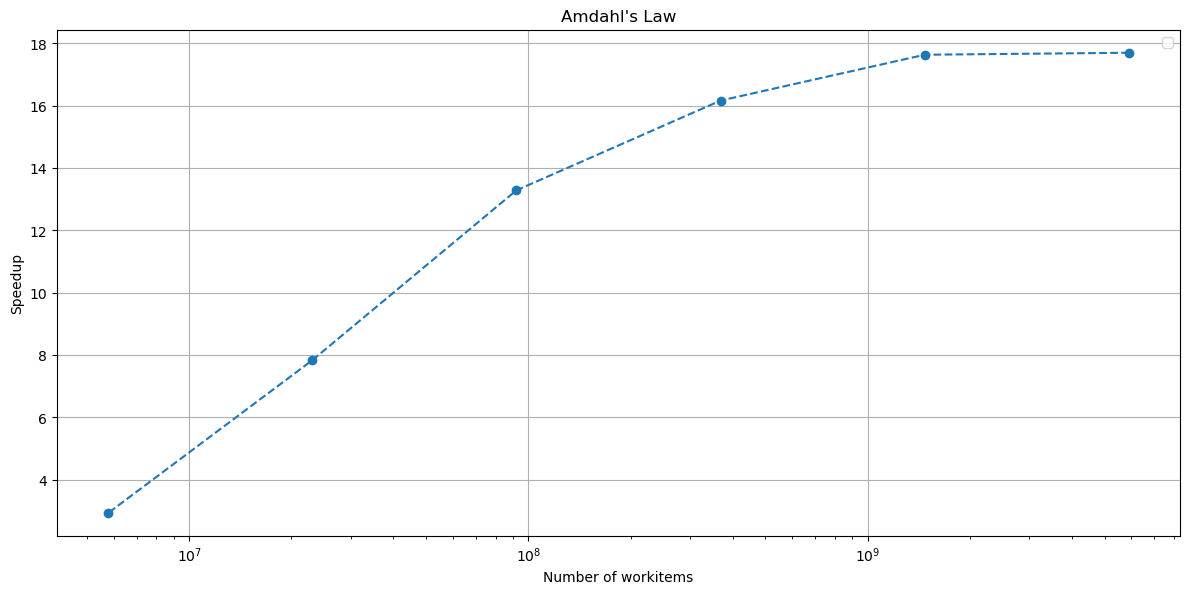

In [11]:
speedup = original/total
plt.figure(figsize=(12, 6))
plt.plot(workitems_per_kernel, speedup, 'o--')
plt.xlabel('Number of workitems')
plt.ylabel('Speedup')
plt.title("Amdahl's Law")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xscale('log')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


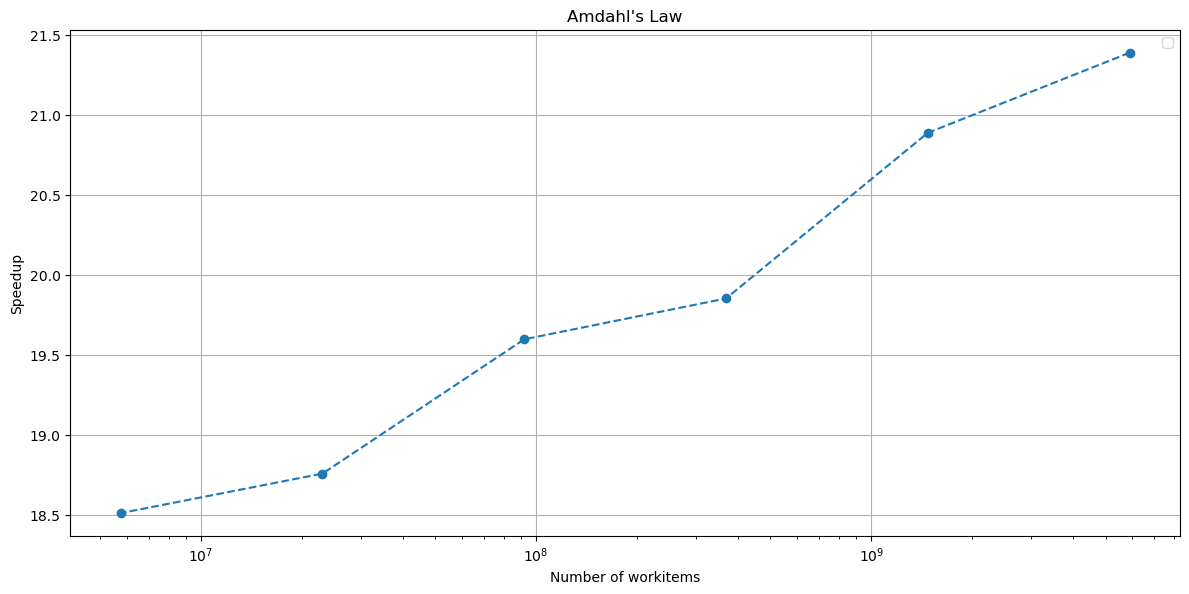

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(workitems_per_kernel, A, 'o--')
plt.xlabel('Number of workitems')
plt.ylabel('Speedup')
plt.title("Amdahl's Law")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xscale('log')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


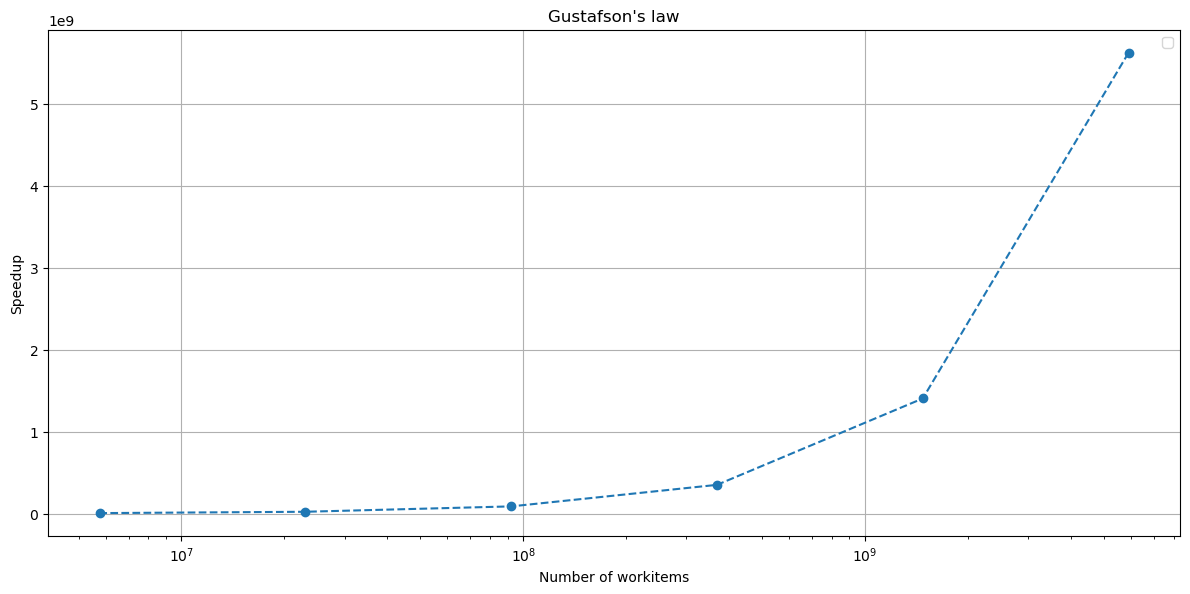

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(workitems_per_kernel, G, 'o--')
plt.xlabel('Number of workitems')
plt.ylabel('Speedup')
plt.title("Gustafson's law")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xscale('log')
plt.show()

In [60]:
#full store times
(54.12451042366666, 3.3645543161273306, 51.293637095, 57.844256723)
(53.641111877, 1.1572551400296285, 52.305124201, 54.333439977)
(52.501464514666665, 1.665822006734371, 50.65518464, 53.891938301)
(72.65322200233332, 4.406410670786789, 68.345520672, 77.152117856)
(172.73208720533336, 9.207780212611803, 166.670535307, 183.327676958)
(474.801421464, 16.021692491974203, 462.604684693, 492.946546235)
#partial store case 40 with different threads
(309.76670491433333, 39.73580388278887, 264.532975854, 339.044382209) #3
(191.57901330366667, 4.034307582752459, 187.061730443, 194.823177103) #8
(178.86941089, 8.72862676962072, 172.792388568, 188.871489747) #10
(144.818914508, 2.544646707368478, 142.429013752, 147.494239044) #12_
(137.05377107533332, 4.445731270172241, 131.948237378, 140.069863701) #12
(202.77386642, 4.876771180277117, 199.620995697, 208.391025949) # 16
threads_3_orig = [[10.463998313000003, 33.35319598399999, 149.33758739100003, 131],[10.204836370999997, 37.066005909000005, 146.04037249899997, 137],[8.738342559999994, 37.71005473499997, 146.77030373699995, 132],[14.424951568000003, 48.07080821, 161.76809995899998, 133],[17.40978301499999, 42.597279088999976, 164.32514019699997, 137],[12.342256358, 43.068416026000016, 169.27113195200002, 130],[22.544953580999984, 37.923234002000015, 175.63342302700013, 137],[15.331645943999993, 56.10696241399999, 164.88257761399996, 133],[11.949863662, 58.396603499999976, 166.02707673100008, 130],[5.729538479, 34.232218085999996, 144.52675195499992, 136],[7.3389890750000015, 31.850905039999994, 145.527410868, 133],[7.893593771999999, 29.377632114000004, 147.95735450899994, 131]]
threads_8_orig = [[22.901754841000006, 31.14670723399999, 59.00045177599998, 125],[28.168202599000008, 32.777671656999985, 57.41017656700001, 119],[32.671766167000015, 28.098914416, 58.20868611899998, 132],[33.35560800900001, 25.835408277000006, 60.07037648099999, 135],[24.792936004000005, 34.131586645999995, 59.60074365500002, 120],[31.14812153400001, 29.061182731999995, 58.624548073999996, 131],[30.577680541000007, 30.730018234000017, 57.51806295599999, 130],[30.422646589000006, 26.311503102999996, 62.07693561500002, 132],[24.816187688000007, 36.81622232399999, 61.19847501499999, 126],[26.91082522100001, 34.807708752, 61.138109795999995, 133],[26.345584477000006, 34.979146745000016, 61.63603339399998, 135],[32.89716433399998, 27.987028986, 62.08263727700004, 135],[32.533273601999994, 31.144176268000006, 59.34753857799999, 130],[26.231878579999986, 37.414641542000005, 59.478018144, 115],[26.88605398700001, 35.40629746200001, 60.901879529, 129],[26.348987595000008, 39.21738620099999, 57.64458696700001, 121],[21.796632324, 30.383572686, 62.26773117300001, 127],[26.49882522799999, 29.82395463099999, 58.21242939700001, 129],[26.546534901999983, 28.30391448000001, 59.65201123000001, 126],[23.351026874, 32.70826151699999, 58.53366899300001, 129],[20.168334787999992, 35.52253179399998, 59.06465561400003, 119],[28.246758791000005, 29.221263525000005, 57.319841299000004, 133],[25.22524636999999, 28.18164054799999, 58.332988065, 136],[23.022202445, 31.205667900999995, 60.72911779299995, 125],[16.060677412000015, 35.22342638700002, 58.71988262900001, 113],[18.099929503999995, 30.763236906999996, 61.170339429000016, 130],[20.091191106999997, 29.836899617, 59.518060701000024, 135],[25.019509809999985, 25.365154103000005, 59.77174425699999, 133],[23.761668170999993, 27.036327989000007, 59.426119080999996, 127],[24.868901757999993, 29.064768663999992, 56.345648362999995, 127],[22.332513027, 29.496660667999993, 58.492318153000014, 127],[26.608264079, 24.601236192999995, 59.20585422599997, 132]]
threads_10_orig = [[31.493879688000007, 29.976643797000005, 38.009052986000015, 132],[34.42349090500001, 28.932453706000004, 36.468105118999986, 123],[31.740176519000002, 27.820986982999997, 36.22891758700001, 127],[32.058716296, 26.538580463, 37.15865873600001, 133],[33.609104147000004, 29.72514792000001, 36.62874661000001, 131],[35.066246091, 28.00626276899999, 36.54622369399999, 131],[33.149953466999996, 31.726749564999995, 35.08432198099998, 122],[32.06129928400001, 30.829363002999997, 36.68588322700002, 125],[32.54529844199999, 33.50195852000002, 33.80240742300001, 121],[28.49347827700001, 29.900721734000005, 37.45291518, 129],[27.48772127799998, 33.91913901400001, 34.34873827800003, 120],[31.159075512, 27.186946426999995, 37.626539202000004, 127],[36.69148088, 30.747630476999984, 37.161905037, 129],[32.886895199, 32.876179893, 39.040266693999996, 123],[31.818650833, 34.257258456, 35.93230334700001, 120],[31.389599406, 31.33250053799999, 37.036991365999995, 126],[25.545001793999987, 34.79391319800002, 39.464479474, 119],[32.66636971500001, 33.19171591500001, 38.974125382000025, 133],[34.6186178, 31.027577922999992, 39.21845427599999, 133],[34.418998069999994, 32.95742753100001, 37.651208086, 122],[27.658153783999996, 35.163956146000004, 39.015817838000004, 128],[34.82789815399998, 31.110992227999997, 39.10536250099997, 131],[31.510685942, 35.29316146699999, 38.400736607999995, 133],[32.986588712, 31.865421367999996, 37.596132823, 124],[41.618588431, 37.004209186999994, 38.652199512, 126],[36.76334286499999, 36.13794488100001, 40.859198079000016, 134],[45.206514287000005, 31.871950066999986, 40.29056889099999, 137],[38.89954507, 39.508627448, 38.996892632, 123],[34.260080931999994, 38.20877981699997, 41.42604214899998, 129],[29.920955429000003, 35.348908823000016, 43.34832532899999, 123],[34.35744230499999, 40.29407886300001, 39.30684725399998, 128],[41.213141808, 35.49335070700001, 40.87311978299998, 132],[36.74382076100001, 41.14866310199999, 39.72954639400001, 123],[37.687492733, 37.288336137, 39.181075818999986, 124],[35.20567866100001, 38.919893423999994, 40.10863942800002, 122],[42.315084899999995, 37.79787861999999, 37.711018732000014, 120],[28.22901599099999, 31.855561084999998, 37.79853323600001, 120],[29.696817536, 31.64299957299999, 38.80905750199997, 129],[29.312255745999998, 34.91502042, 36.018694831000005, 115],[31.998743993000005, 28.493307422, 39.85227035, 133],[31.42026110500001, 30.064288613999995, 38.942127291, 135],[28.00613329899999, 34.748412701999996, 37.34265969500002, 119],[28.365233427999993, 36.907384928, 35.23982002800001, 112],[30.08499611800001, 31.232256927999998, 39.304201441999986, 134],[32.218199131000006, 29.230519625000017, 39.24433066599997, 134],[31.731664446999996, 31.097494415999986, 37.941890697999995, 132],[34.427926288, 28.338231368000002, 38.153825832999985, 132],[32.24825105900002, 31.279113310000003, 37.38575746499998, 126]]
threads_12__orig = [[24.400629428000002, 19.00751144000001, 38.26663321300002, 129],[23.834106503000008, 19.425963796, 38.173647469999985, 131],[21.52126177199999, 23.483385723000012, 36.69397685700001, 129],[22.583418425000016, 21.215638020999997, 37.814295103000006, 132],[20.76765491, 27.044925676000016, 34.071882503999994, 116],[23.807827514000003, 20.28034174799999, 37.51870277199999, 131],[23.127785573999994, 22.082254572999993, 36.637692644, 119],[23.02962907899999, 21.706994219, 36.896700755999994, 131],[21.79897817, 23.291654999000002, 36.81685780699999, 128],[20.594077259000006, 22.80793651300001, 38.338028807, 132],[18.312605251999997, 27.492738434000003, 35.852387043000014, 118],[20.375399428000005, 25.070193688000007, 36.32661772199999, 125],[23.209471926, 21.011101070000002, 36.882812913, 131],[22.354889219999993, 22.171771395, 36.63992066999999, 129],[23.749990840999992, 20.596181438000002, 36.863314998999996, 126],[21.477078064000004, 23.425482487000004, 36.336925494000006, 124],[20.87411144499999, 25.17890712599999, 35.26727029200001, 121],[22.711003922000003, 22.127019409999996, 36.52093241000001, 128],[21.889081880999992, 21.57039531999999, 37.91288404700002, 138],[20.745908841000002, 23.720989597000003, 36.970195615000016, 129],[22.347474243000008, 22.512534792999997, 36.579033797000015, 127],[23.616515326999988, 21.75465617600001, 36.07693571600002, 128],[21.114403171000003, 24.045650241, 36.38303699199999, 124],[20.068503151999998, 25.493634020000005, 36.02925762800002, 116],[20.177484394999997, 17.315067720999995, 36.842866203, 133],[15.571331525999996, 21.929492312999994, 36.93144964100001, 125],[17.600849952000004, 19.333545401000006, 37.63003084, 130],[16.836853390000005, 21.410973430000002, 36.482015653, 127],[18.010088590000002, 19.251659134999997, 37.279567288, 131],[19.82897813400001, 17.083692514999996, 37.777286281999984, 133],[18.118631165000004, 18.967271957, 37.646805253000004, 129],[18.876352845, 18.835623443000014, 37.090100471999975, 130],[17.896491355000002, 20.935488387, 35.81396603499999, 123],[20.232351107, 16.299680442999996, 38.154086936, 131],[16.69103173, 24.081885549999992, 33.966982822, 111],[14.679946452000008, 25.001729502999996, 35.23077148599999, 118],[20.97906758000001, 18.598123375, 37.76757179599999, 130],[19.200038716999995, 23.131776832999993, 35.05165346099999, 124],[19.29995493500001, 20.962766125, 37.169068155999994, 127],[17.93456486, 22.356857644000012, 37.221977980000005, 130],[20.89536323399999, 20.191965739999986, 36.42366435100002, 129],[20.69253212700001, 20.921934003999997, 35.94683418699998, 124],[18.177941886, 23.47553213300001, 35.96692650199999, 124],[18.219103471999997, 23.776085969000007, 35.684464098999996, 127],[19.26851195099999, 22.13126341399999, 36.31036372399999, 120],[17.23853856400001, 21.97429601799999, 38.552682716, 128],[21.032515212999996, 20.375734106999992, 36.40175676, 128],[19.504798948999998, 21.717305145000005, 36.686817274, 130]]
threads_12_orig = [[40.41045627200001, 37.153041387, 41.765693094, 130],[35.79794479200001, 42.996888418, 40.42217234999999, 121],[39.97456128999997, 38.53731912400002, 40.865065601, 130],[41.01793486900001, 35.913950607999986, 42.601312437999994, 132],[38.38783396, 38.229859775000016, 42.809046628, 127],[33.177976809, 44.91730367599998, 41.46785406500002, 121],[34.29745303300001, 48.973150950999994, 36.275716417000005, 117],[38.345199914, 40.004301988000016, 41.20326046399999, 128],[42.648748085, 37.312662426, 39.821394948, 131],[40.211506763, 38.09051841700002, 41.490712835, 129],[37.16448186600001, 41.01647474399999, 41.502676486000006, 134],[37.72508596699997, 43.787901108, 38.09729883499999, 121],[15.810619700999997, 18.336389330000006, 35.947936244, 126],[16.428505790000006, 18.255399211999993, 36.19363254600001, 126],[16.570038541000006, 19.22973920300001, 35.12226649200001, 123],[16.799893667, 18.564402185, 34.882149105, 125],[17.136367215000007, 18.069875484, 35.80574454099998, 126],[16.693514285, 16.123787468000003, 37.496024449, 134],[17.315388189000004, 16.71800930899999, 36.32234975499998, 128],[17.376285459, 17.720971039000005, 36.025076941999984, 128],[15.399649718999994, 19.570248178000003, 36.194464932000024, 127],[16.057069779999992, 18.483690977999988, 36.664195311000014, 126],[17.525315215999996, 18.078012595, 34.91344195300002, 124],[16.146825113000002, 17.660016273000004, 36.72052813600002, 128],[18.284209602000008, 18.679096822999995, 35.23215332399998, 121],[16.015128802, 19.841395395999992, 36.394282039, 117],[17.747233254999998, 19.18289507, 35.34763227399999, 125],[16.104475186999995, 19.928982538999982, 36.27765197199998, 130],[17.707580804, 18.804840876, 35.82823777199999, 128],[19.326718243000006, 16.917868250000005, 36.15489114600001, 128],[17.035293216999992, 18.006615544000002, 37.399090926999996, 130],[18.271710081000002, 18.949513709000005, 35.26376363000002, 124],[18.44014136700001, 17.665240669, 36.447275148999985, 127],[19.21270640299999, 16.892482039999997, 36.45713233999999, 131],[16.161130500000002, 19.469261826, 36.97701540999999, 127],[16.511596027000003, 18.806195600000002, 37.32626817499999, 133],[14.335685556999994, 19.375140841, 36.82678639000003, 133],[17.293026068000003, 16.941911105999996, 36.330073037, 124],[16.126153994, 18.331957823000003, 36.14338347699999, 128],[16.274569152, 19.558254667000003, 34.782167210999994, 121],[17.275250030000002, 16.431002633, 36.966928919, 127],[14.965328298999998, 19.976704685999998, 35.76249688699999, 126],[16.343901617999997, 19.046137260000002, 35.35513842099999, 126],[17.54331270999999, 18.321687761, 34.91867094, 126],[15.602065854, 19.090400540999994, 36.125611689, 128],[14.511094787999998, 20.357434667, 35.967063884999995, 129],[17.322561987000004, 17.847234511999996, 35.73533575700001, 126],[16.765054268000004, 17.602832698999997, 36.582838068000015, 127]]
threads_16_orig = [[46.727662034999994, 43.10351406400001, 34.14489799399998, 128],[46.256938672, 44.65568333999999, 34.348050192, 125],[47.17282895799998, 44.25449527399999, 32.940477318999996, 127],[46.006940196, 43.15625326000001, 34.756155096, 131],[46.48780249900004, 43.550129907999974, 33.49669416700001, 120],[45.776383906999996, 47.28118968699997, 32.03143459299999, 118],[42.498075095, 47.353723035, 33.865941047999996, 124],[44.21615282099997, 43.243152546999966, 36.37436799600001, 126],[48.96345713799999, 40.896469691, 34.848833641999995, 128],[46.14888543599999, 41.18855931700001, 36.25996479800002, 135],[45.784385745, 44.619718381, 34.453968937999996, 124],[45.79423996599999, 43.28470245000001, 35.347649865000015, 126],[46.93830810699999, 43.706059104, 34.415414725, 130],[51.42948251899999, 40.16195759100001, 33.613147466, 128],[51.679453530999986, 37.47635868699998, 35.527353058, 130],[43.696091474999996, 43.48015739999998, 37.03596620299999, 125],[44.028529383000006, 45.00031193300002, 30.407830499999992, 129],[47.981671154000004, 40.706446344999996, 30.738677527, 125],[44.97760868700003, 43.43277216899997, 31.363937733000007, 132],[46.42440125100002, 43.987564688999996, 29.497908858000002, 115],[43.28758327200001, 46.126379277, 30.600378795000005, 125],[44.703927068999974, 41.041782624, 34.22376476999999, 139],[42.394254708000005, 48.95088401000002, 28.820359404999994, 112],[44.967951642999985, 43.125010796000026, 32.150265065999996, 129],[44.278573212999994, 44.10558279399999, 31.81841774599998, 131],[43.23122043499999, 44.940482875, 32.127964575, 128],[47.02738160200002, 42.32553298000001, 31.263834814999996, 130],[45.82471281700003, 39.00268447499999, 31.218833699999998, 128],[40.10965693800001, 49.075269723999995, 31.380864772000013, 127],[46.838472084999985, 42.26782427600002, 31.687686474000003, 128],[47.815422391999995, 42.067464335999986, 30.733362376, 128],[45.23742497400002, 45.8350501, 29.930958224000005, 119],[47.419170579, 39.47421127299999, 31.398483041, 131],[48.81487543400001, 42.999910617, 31.23145326499999, 128],[41.539369447999995, 46.30060429500001, 30.692134747999994, 125],[48.06611825000001, 44.90534184, 30.163534254999995, 118],[39.999943170000016, 49.14880211799999, 33.94088183400002, 125],[49.66214647199998, 40.82630191799999, 32.68982390600001, 128],[45.81441454000001, 45.12506815200002, 32.36956270500001, 129],[44.43848817400001, 45.20801553300001, 33.718659350999985, 132],[45.822897769000015, 45.407730140000005, 32.125821475, 124],[50.42948804199999, 41.753870467999995, 31.202785188999993, 116],[41.913551545999994, 49.09175584100002, 32.420712910000006, 121],[47.947102111000014, 44.41957121900003, 31.097897881999987, 131],[45.310561315, 45.325046739000015, 32.867874091000004, 136],[51.795588787999975, 40.260264444000015, 31.48335732000001, 127],[44.311309365000014, 48.15961089699999, 31.089395622999987, 134],[48.071335194000014, 44.04357320999999, 31.383728712000014, 120],[51.80265971699998, 43.24718911699998, 30.605227185000007, 123],[47.676715980999994, 46.577523545000005, 31.477392248999987, 123],[47.63241988099997, 46.396473961000005, 31.833676039, 121],[47.36389144900001, 44.540618445, 30.036979712999997, 126],[47.569202774, 47.62285247699998, 30.592786060999998, 119],[47.41328274599998, 47.686729086, 30.585907844, 129],[47.29480640600002, 45.398203378999995, 32.93634355299999, 128],[44.793084122, 51.03482017400003, 30.11529929300001, 119],[51.61165986899997, 42.436213506, 31.781792024000012, 126],[47.986254231000004, 44.69041998999999, 33.34123191699998, 135],[49.56800394599997, 47.752093023, 28.740777849000004, 119],[48.03712333999999, 44.378714308, 33.53010536900002, 130],[50.43898444399998, 42.67233698100001, 31.34999921499999, 131],[48.75946988800001, 45.53344456300001, 31.810052856, 136],[46.90389654999999, 46.94489703500001, 32.19411022200001, 131],[42.62739162099998, 48.11427974699999, 31.468072285999984, 129]]

threads_3 = [[e[0]/e[3], e[1]/e[3], e[2]/e[3]] for e in threads_3_orig]
threads_8 = [[e[0]/e[3], e[1]/e[3], e[2]/e[3]] for e in threads_8_orig]
threads_12 = [[e[0]/e[3], e[1]/e[3], e[2]/e[3]] for e in threads_12_orig]
threads_16 = [[e[0]/e[3], e[1]/e[3], e[2]/e[3]] for e in threads_16_orig]

threads_3_ = [[e[3]] for e in threads_3_orig]
threads_8_ = [[e[3]] for e in threads_8_orig]
threads_12_ = [[e[3]] for e in threads_12_orig]
threads_16_ = [[e[3]] for e in threads_16_orig]
def f(array):
    
    sums = np.array(array)[:, :3].sum(axis=1)
    max_index = np.argmax(sums)
    max_row = array[max_index]
    
    time_per_element = [[e[0]/e[3], e[1]/e[3], e[2]/e[3]] for e in array]
    elements = [e[3] for e in array]

    chunks = np.array_split(array, 4)
    max_rows = []
    for chunk in chunks:
        sums = chunk[:, :3].sum(axis=1)
        max_idx = np.argmax(sums)
        max_rows.append(chunk[max_idx])
    max_rows = np.array(max_rows)
    average_row = max_rows.mean(axis=0)
    
    return (np.mean(time_per_element, axis=0), np.mean(elements, axis=0), np.mean(time_per_element, axis=0) * np.mean(elements, axis=0), sum(np.mean(time_per_element, axis=0) * np.mean(elements, axis=0)), average_row, sum(average_row[:3]))

f(threads_3_orig)
f(threads_8_orig)
f(threads_10_orig)
f(threads_12__orig)
f(threads_12_orig)
f(threads_16_orig)
#print(np.mean(threads_3, axis=0), np.mean(threads_3_, axis=0), p.mean(threads_3, axis=0) * np.mean(threads_3_, axis=0), )
#print(np.mean(threads_8, axis=0), np.mean(threads_8_, axis=0), )
#print(np.mean(threads_12, axis=0), np.mean(threads_12_, axis=0), )
#print(np.mean(threads_16, axis=0), np.mean(threads_16_, axis=0), )

(array([0.36774613, 0.35168955, 0.25499394]),
 126.5625,
 array([46.54286916, 44.51070902, 32.27267104]),
 123.32624921321988,
 array([ 46.14128572,  46.04594722,  31.79461422, 128.5       ]),
 123.98184717350001)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


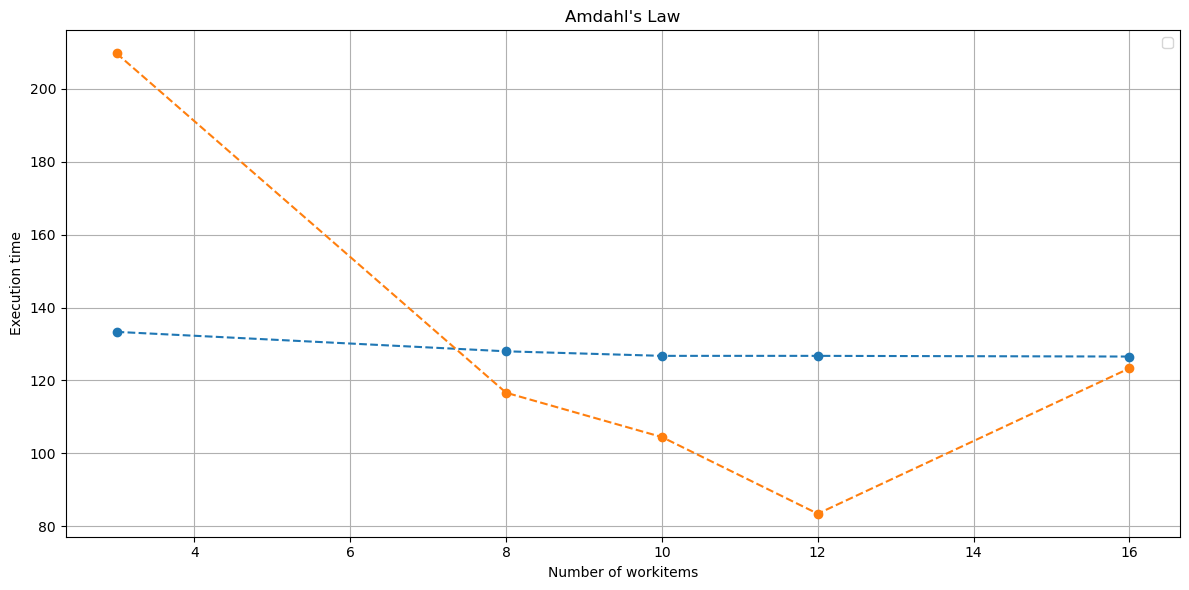

In [65]:
threads = [3,8,10,12,16]
list = [f(threads_3_orig),
        f(threads_8_orig),
        f(threads_10_orig),
        f(threads_12_orig),
        f(threads_16_orig)]
avg_time = [e[1]for e in list]
longest = [e[3]for e in list]
plt.figure(figsize=(12, 6))
plt.plot(threads, avg_time, 'o--')
plt.plot(threads, longest, 'o--')
plt.xlabel('Number of workitems')
plt.ylabel('Execution time')
plt.title("Amdahl's Law")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
time_without_speedup = np.array([962.2290223936666])
time_with_speedup = np.array([54.12451042366666, 53.641111877, 52.501464514666665, 72.65322200233332, 172.73208720533336, 474.801421464])
